In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('bank-marketing.csv')

In [6]:
df['response']=df['response'].apply(lambda x: 0 if x=='no' else 1)

In [7]:
df.head()


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [8]:
df['response']=df['response'].apply(str)

In [9]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='campaign', ylabel='count'>

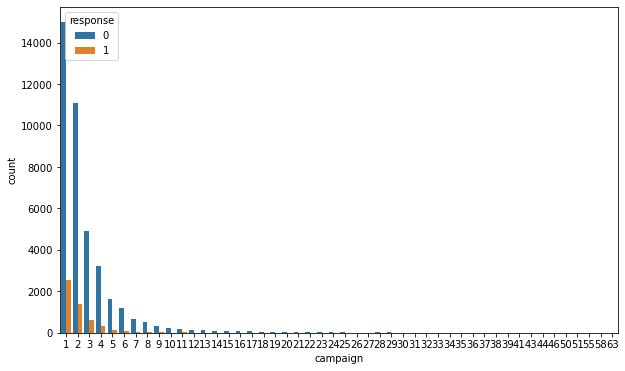

In [11]:

plt.figure(figsize=(10,6))
sns.countplot(x="campaign",data=df,hue='response')

In [12]:
coorMatrix=df.corr()

In [13]:
print (coorMatrix)

               age    salary   balance       day  duration  campaign  \
age       1.000000  0.024357  0.097783 -0.009120 -0.004648  0.004760   
salary    0.024357  1.000000  0.055469  0.027864 -0.009937  0.015005   
balance   0.097783  0.055469  1.000000  0.004503  0.021560 -0.014578   
day      -0.009120  0.027864  0.004503  1.000000 -0.030206  0.162490   
duration -0.004648 -0.009937  0.021560 -0.030206  1.000000 -0.084570   
campaign  0.004760  0.015005 -0.014578  0.162490 -0.084570  1.000000   
pdays    -0.023758 -0.014968  0.003435 -0.093044 -0.001565 -0.088628   
previous  0.001288  0.014564  0.016674 -0.051710  0.001203 -0.032855   

             pdays  previous  
age      -0.023758  0.001288  
salary   -0.014968  0.014564  
balance   0.003435  0.016674  
day      -0.093044 -0.051710  
duration -0.001565  0.001203  
campaign -0.088628 -0.032855  
pdays     1.000000  0.454820  
previous  0.454820  1.000000  


<AxesSubplot:>

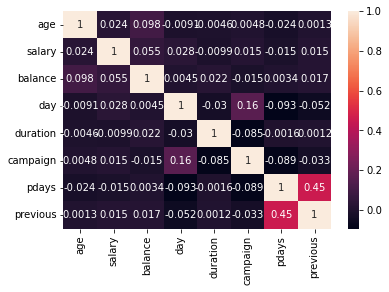

In [14]:
sns.heatmap(coorMatrix,annot=True)

<AxesSubplot:xlabel='response', ylabel='age'>

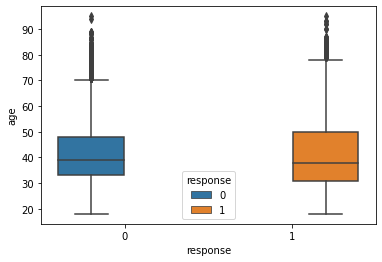

In [15]:
sns.boxplot(x='response',y='age',data=df,hue='response')

<AxesSubplot:xlabel='response', ylabel='duration'>

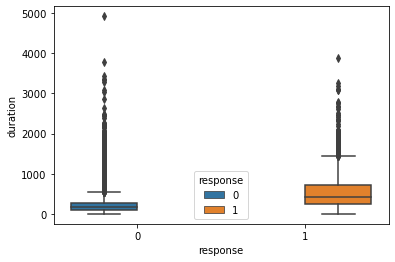

In [16]:
sns.boxplot(x='response',y='duration',data=df,hue='response')

In [17]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [18]:
df=df.dropna()

In [19]:
df["age"]=df["age"].apply(int)
df["duration"]=df["duration"].apply(int)
df["salary"]=df["salary"].apply(int)
df["balance"]=df["balance"].apply(int)
df["day"]=df["day"].apply(int)
df["duration"]=df["duration"].apply(int)
df["campaign"]=df["campaign"].apply(int)
df["pdays"]=df["pdays"].apply(int)
df["previous"]=df["previous"].apply(int)
df["month"]=df["month"].apply(str)
df["response"]=df["response"].apply(str)

In [20]:

from sklearn.preprocessing import OneHotEncoder

In [21]:
X=df[['age','job','salary','marital','education','targeted','default','balance','housing','loan','day','month','duration','campaign','pdays','previous']]
Y=df["response"]

In [22]:
cats_cols=list(X.columns[X.dtypes =='object'])
print(cats_cols)

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'month']


In [23]:
num_cols=list(X.columns[X.dtypes !='object'])
print(num_cols)

['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [24]:
X_dummy=pd.get_dummies(X[cats_cols],drop_first=True)

In [25]:
X_new=pd.concat([X_dummy,X[num_cols]],axis=1,join='inner')

In [26]:
Y.shape

(45211,)

In [27]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=.3,random_state=123)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logreg=LogisticRegression()

In [35]:
logreg.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(X_test)
logreg.score(y_pred,Y_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(Y_test,y_pred)

0.8894131524624005

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [42]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [43]:
y_rfc_pred=rfc.predict(X_test)

In [44]:
accuracy_score(Y_test,y_rfc_pred)

0.9015039811265113

In [45]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(Y_test,y_pred)

In [46]:
cnf_matrix

array([[11818,   180],
       [ 1320,   246]], dtype=int64)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 15.0, 'predict Values')

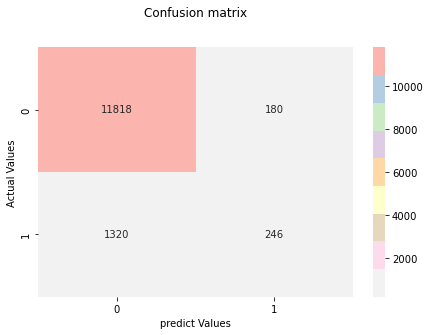

In [58]:
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap= 'Pastel1_r',fmt='g')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('predict Values')